In [1]:
import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open the json file
json_file=open("loan_data.json")

In [3]:
data=json.load(json_file)

In [4]:
#transition to dataframe
loandata=pd.DataFrame(data)

In [5]:
loandata.head(5)

,credit.policy,days.with.cr.line,delinq.2yrs,dti,fico,inq.last.6mths,installment,int.rate,log.annual.inc,not.fully.paid,pub.rec,purpose,revol.bal,revol.util
0,1,5639.958333,0,19.48,737,0,829.10,0.1189,11.350407,0,0,debt_consolidation,28854,52.1
1,1,2760.000000,0,14.29,707,0,228.22,0.1071,11.082143,0,0,credit_card,33623,76.7
2,1,4710.000000,0,11.63,682,1,366.86,0.1357,10.373491,0,0,debt_consolidation,3511,25.6
3,1,2699.958333,0,8.10,712,1,162.34,0.1008,11.350407,0,0,debt_consolidation,33667,73.2
4,1,4066.000000,1,14.97,667,0,102.92,0.1426,11.299732,0,0,credit_card,4740,39.5


In [6]:
#finding the unique value for purpose
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [7]:
#brief summary of loandata
loandata.describe()

,credit.policy,days.with.cr.line,delinq.2yrs,dti,fico,inq.last.6mths,installment,int.rate,log.annual.inc,not.fully.paid,pub.rec,revol.bal,revol.util
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000
mean,0.804970,4560.767197,0.163708,12.606679,710.846314,1.577469,319.089413,0.122640,10.932117,0.160054,0.062122,1.691396e+04,46.799236
std,0.396245,2496.930377,0.546215,6.883970,37.970537,2.200245,207.071301,0.026847,0.614813,0.366676,0.262126,3.375619e+04,29.014417
min,0.000000,178.958333,0.000000,0.000000,612.000000,0.000000,15.670000,0.060000,7.547502,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,2820.000000,0.000000,7.212500,682.000000,0.000000,163.770000,0.103900,10.558414,0.000000,0.000000,3.187000e+03,22.600000
50%,1.000000,4139.958333,0.000000,12.665000,707.000000,1.000000,268.950000,0.122100,10.928884,0.000000,0.000000,8.596000e+03,46.300000
75%,1.000000,5730.000000,0.000000,17.950000,737.000000,2.000000,432.762500,0.140700,11.291293,0.000000,0.000000,1.824950e+04,70.900000
max,1.000000,17639.958330,13.000000,29.960000,827.000000,33.000000,940.140000,0.216400,14.528354,1.000000,5.000000,1.207359e+06,119.000000


In [8]:
loandata["int.rate"].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [9]:
loandata["fico"].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

In [10]:
#get the annual income in$
income=np.exp(loandata['log.annual.inc'])

In [11]:
#add annual income 
loandata['annualincome']=income

In [12]:
#get the shape of data frame 
loandata.shape
#get length 
length=len(loandata['fico'])

In [24]:
#create a category pf fico
ficocat=[]
for x in range(0,length):
    category=loandata['fico'][x]
    try:
        if category >= 300 and category < 400:
            cat='Very Poor'
        elif category >= 400 and category < 600:
            cat='Poor'
        elif category >= 600 and category < 660:
            cat='Fair'
        elif category >= 660 and category < 700:
            cat='Good'
        elif category >= 700 :
            cat='Excellent' 
        else:
            cat="Unknown"
      
    except:
        cat='Error-Unknown'
    
    ficocat.append(cat)

In [25]:
#add category to loan data
loandata["fico_category"]=ficocat
#can aslso youse pd.series loandata["fico_category"]=pd.Series(ficocat)

In [26]:
loandata.head(5)

,credit.policy,days.with.cr.line,delinq.2yrs,dti,fico,inq.last.6mths,installment,int.rate,log.annual.inc,not.fully.paid,pub.rec,purpose,revol.bal,revol.util,annualincome,fico_category,int_rate_type
0,1,5639.958333,0,19.48,737,0,829.10,0.1189,11.350407,0,0,debt_consolidation,28854,52.1,85000.000385,Excellent,low
1,1,2760.000000,0,14.29,707,0,228.22,0.1071,11.082143,0,0,credit_card,33623,76.7,65000.000073,Excellent,low
2,1,4710.000000,0,11.63,682,1,366.86,0.1357,10.373491,0,0,debt_consolidation,3511,25.6,31999.999943,Good,High
3,1,2699.958333,0,8.10,712,1,162.34,0.1008,11.350407,0,0,debt_consolidation,33667,73.2,85000.000385,Excellent,low
4,1,4066.000000,1,14.97,667,0,102.92,0.1426,11.299732,0,0,credit_card,4740,39.5,80799.999636,Good,High


In [27]:
#create a new dimension 'interest rate type category' and add high and lwo based the interest rate
loandata.loc[loandata['int.rate']>0.12,'int_rate_type']='High'

In [28]:
loandata.loc[loandata['int.rate']<=0.12,'int_rate_type']='low'

In [29]:
#create a chart to check the number of people in each category
#number of rows per category
catplot=loandata.groupby(['fico_category']).size()

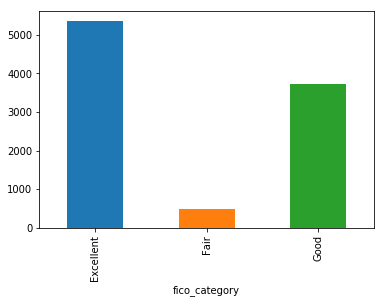

In [30]:
catplot.plot.bar()
plt.show()

In [31]:
#number of rows per purpose category
purpose_plot=loandata.groupby(['purpose']).size()

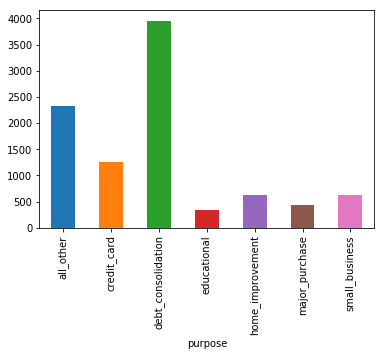

In [32]:
purpose_plot.plot.bar()
plt.show()

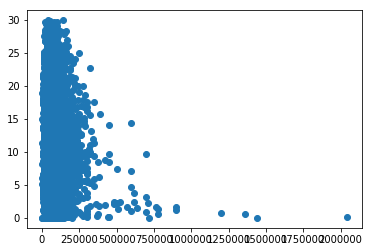

In [23]:
xpoint=loandata['annualincome']
ypoint=loandata['dti']
plt.scatter(xpoint,ypoint)
plt.show()

In [33]:
#add the index and save it
loandata.to_csv('loancleaned.csv',index=True)